In [ ]:
from zipfile import ZipFile
file = "/content/23777_30378_upload_training_set.zip"

with ZipFile(file, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle

Using TensorFlow backend.


In [ ]:
import glob
import cv2

test_x = []
test_y = []
for img in glob.glob("/content/test_set/cats/*.jpg"):
    n= cv2.imread(img)
    n = cv2.resize(n, dsize=(100, 100), interpolation=cv2.INTER_CUBIC)
    test_x.append(n)
    test_y.append(0)

for img in glob.glob("/content/test_set/dogs/*.jpg"):
    n= cv2.imread(img)
    n = cv2.resize(n, dsize=(100, 100), interpolation=cv2.INTER_CUBIC)
    test_x.append(n)
    test_y.append(1)

test_x = np.array(test_x)
test_y = np.array(test_y)

In [ ]:
train_x = []
train_y = []
for img in glob.glob("/content/training_set/cats/*.jpg"):
    n= cv2.imread(img)
    n = cv2.resize(n, dsize=(100, 100), interpolation=cv2.INTER_CUBIC)
    train_x.append(n)
    train_y.append(0)

for img in glob.glob("/content/training_set/dogs/*.jpg"):
    n= cv2.imread(img)
    n = cv2.resize(n, dsize=(100, 100), interpolation=cv2.INTER_CUBIC)
    train_x.append(n)
    train_y.append(1)

train_x = np.array(train_x)
train_y = np.array(train_y)

In [ ]:
test_y=to_categorical(test_y,dtype='int32')
train_y=to_categorical(train_y,dtype='int32')

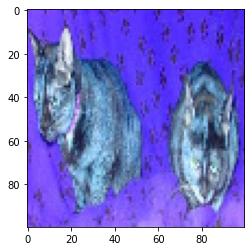

In [ ]:
plt.imshow(test_x[4])

In [ ]:
train_x, train_y = shuffle(np.array(train_x), np.array(train_y))
test_x, test_y = shuffle(np.array(test_x), np.array(test_y))

[0 1]


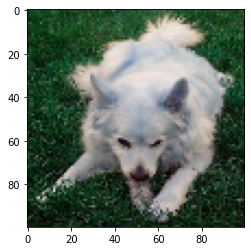

In [ ]:
i=90
plt.imshow(test_x[i])
print(test_y[i])

In [ ]:
print(test_x.shape)
test_x=test_x/255
train_x=train_x/255

(2023, 100, 100, 3)


In [ ]:
def get_model():
  model= Sequential()

  model.add(Conv2D(filters=20,kernel_size=3,padding='same',activation='relu',input_shape=(100,100,3)))
  model.add(Conv2D(filters=20,kernel_size=3,padding='same',activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2,2)))

  model.add(Conv2D(filters=30,kernel_size=3,strides=(2,2),activation='relu'))
  model.add(Conv2D(filters=30,kernel_size=3,strides=(2,2),activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2,2)))

  model.add(Flatten())
  model.add(Dropout(0.3))
  
  model.add(Dense(2,activation='sigmoid'))

  return model

In [ ]:
model=get_model()

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=50)

Train on 8005 samples, validate on 2023 samples
Epoch 1/50
8005/8005 [==============================] - 9s 1ms/step - loss: 0.6836 - accuracy: 0.5816 - val_loss: 0.6657 - val_accuracy: 0.5833
Epoch 2/50
8005/8005 [==============================] - 8s 1ms/step - loss: 0.6413 - accuracy: 0.6215 - val_loss: 0.8546 - val_accuracy: 0.5462
Epoch 3/50
8005/8005 [==============================] - 8s 1ms/step - loss: 0.6122 - accuracy: 0.6627 - val_loss: 0.6502 - val_accuracy: 0.6080
Epoch 4/50
8005/8005 [==============================] - 8s 1ms/step - loss: 0.5790 - accuracy: 0.6956 - val_loss: 0.6140 - val_accuracy: 0.6772
Epoch 5/50
8005/8005 [==============================] - 8s 1ms/step - loss: 0.5524 - accuracy: 0.7154 - val_loss: 0.6008 - val_accuracy: 0.6777
Epoch 6/50
8005/8005 [==============================] - 9s 1ms/step - loss: 0.5371 - accuracy: 0.7245 - val_loss: 0.6182 - val_accuracy: 0.6708
Epoch 7/50
8005/8005 [==============================] - 9s 1ms/step - loss: 0.5115 - acc

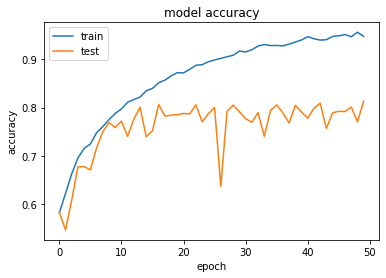

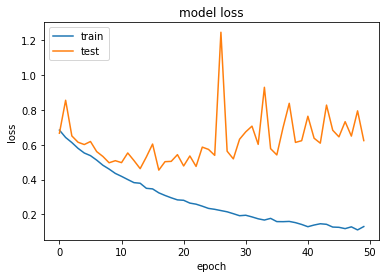

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:

model.evaluate(x=test_x,y=test_y)

2023/2023 [==============================] - 1s 376us/step


[0.6234046079060022, 0.8136430978775024]